<a href="https://colab.research.google.com/github/Latetera/Challenge_Telecom_X_parte_2/blob/main/Challenge_Telecom_X_parte_2_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Preparación de los datos**

##**Extracción**

In [1]:
#monta la unidad de Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('/content/drive/MyDrive/TelecomX_normalizado.csv')
df.head()

Cliente_ID Evasión  Género  3a_Edad Pareja Dependientes  Meses Telefonía  \
0  0002-ORFBO      No   Mujer        0    Yes          Yes      9        Sí   
1  0003-MKNFE      No  Hombre        0     No           No      9        Sí   
2  0004-TLHLJ      Sí  Hombre        0     No           No      4        Sí   
3  0011-IGKFF      Sí  Hombre        1    Yes           No     13        Sí   
4  0013-EXCHZ      Sí   Mujer        1    Yes           No      3        Sí   

  Multilínea Internet  ... Asistencia_Técnica TV_Cable Streaming_películas  \
0         No       Sí  ...                Yes       Sí                  No   
1        Yes       Sí  ...                 No       No                  Sí   
2         No       Sí  ...                 No       No                  No   
3         No       Sí  ...                 No       Sí                  Sí   
4         No       Sí  ...                Yes       Sí                  No   

  Tipo_Contrato Factura_Electrónica          Forma_Pago Cargo_Diario  \
0         Anual                 Yes       Cheque postal         2.19   
1       Mensual                  No       Cheque postal         2.00   
2       Mensual                 Yes  Cheque electrónico         2.46   
3       Mensual                 Yes  Cheque electrónico         3.27   
4       Mensual                 Yes       Cheque postal         2.80   

  Cargo_Mensual Cargo_Total Servicios_Totales  
0          65.6      593.30                 6  
1          59.9      542.40                 4  
2          73.9      280.85                 4  
3          98.0     1237.85                 7  
4          83.9      267.40                 5  

[5 rows x 24 columns]

##**Eliminación de columnas irrelevantes**

In [4]:
#evalúa las observaciones para eliminar las innecesarias
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Cliente_ID              7032 non-null   object 
 1   Evasión                 7032 non-null   object 
 2   Género                  7032 non-null   object 
 3   3a_Edad                 7032 non-null   int64  
 4   Pareja                  7032 non-null   object 
 5   Dependientes            7032 non-null   object 
 6   Meses                   7032 non-null   int64  
 7   Telefonía               7032 non-null   object 
 8   Multilínea              7032 non-null   object 
 9   Internet                7032 non-null   object 
 10  Conexión                7032 non-null   object 
 11  Seguridad_online        7032 non-null   object 
 12  Respaldo_online         7032 non-null   object 
 13  Protección_Dispositivo  7032 non-null   object 
 14  Asistencia_Técnica      7032 non-null   

In [5]:
#localiza las columnas innecesarias
columnas_irrelevantes = df.iloc[:,[0,3,4,5,8,11,12,13,14,18,19]]
columnas_irrelevantes.head()

Cliente_ID  3a_Edad Pareja Dependientes Multilínea Seguridad_online  \
0  0002-ORFBO        0    Yes          Yes         No               No   
1  0003-MKNFE        0     No           No        Yes               No   
2  0004-TLHLJ        0     No           No         No               No   
3  0011-IGKFF        1    Yes           No         No               No   
4  0013-EXCHZ        1    Yes           No         No               No   

  Respaldo_online Protección_Dispositivo Asistencia_Técnica  \
0             Yes                     No                Yes   
1              No                     No                 No   
2              No                    Yes                 No   
3             Yes                    Yes                 No   
4              No                     No                Yes   

  Factura_Electrónica          Forma_Pago  
0                 Yes       Cheque postal  
1                  No       Cheque postal  
2                 Yes  Cheque electrónico  
3                 Yes  Cheque electrónico  
4                 Yes       Cheque postal

In [6]:
#descarta las columnas innecesarias
df.drop(columnas_irrelevantes, axis=1, inplace=True)
df.head()

Evasión  Género  Meses Telefonía Internet      Conexión TV_Cable  \
0      No   Mujer      9        Sí       Sí           DSL       Sí   
1      No  Hombre      9        Sí       Sí           DSL       No   
2      Sí  Hombre      4        Sí       Sí  Fibra óptica       No   
3      Sí  Hombre     13        Sí       Sí  Fibra óptica       Sí   
4      Sí   Mujer      3        Sí       Sí  Fibra óptica       Sí   

  Streaming_películas Tipo_Contrato  Cargo_Diario  Cargo_Mensual  Cargo_Total  \
0                  No         Anual          2.19           65.6       593.30   
1                  Sí       Mensual          2.00           59.9       542.40   
2                  No       Mensual          2.46           73.9       280.85   
3                  Sí       Mensual          3.27           98.0      1237.85   
4                  No       Mensual          2.80           83.9       267.40   

   Servicios_Totales  
0                  6  
1                  4  
2                  4  
3                  7  
4                  5

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Evasión              7032 non-null   object 
 1   Género               7032 non-null   object 
 2   Meses                7032 non-null   int64  
 3   Telefonía            7032 non-null   object 
 4   Internet             7032 non-null   object 
 5   Conexión             7032 non-null   object 
 6   TV_Cable             7032 non-null   object 
 7   Streaming_películas  7032 non-null   object 
 8   Tipo_Contrato        7032 non-null   object 
 9   Cargo_Diario         7032 non-null   float64
 10  Cargo_Mensual        7032 non-null   float64
 11  Cargo_Total          7032 non-null   float64
 12  Servicios_Totales    7032 non-null   int64  
dtypes: float64(3), int64(2), object(8)
memory usage: 714.3+ KB


#**Correlacion y selección de variables**

##**Análisis de correlación**

In [8]:
#evalua columnas textuales como numéricas

#copia el dataframe para no alterar el original
df_alterno = df.copy()

#true
df_alterno.replace('Sí', 1, inplace=True)

#false
valores_false = ['No', 'Sin servicio de internet']
for elemento in valores_false:
    df_alterno.replace(elemento, 0, inplace=True)

df_alterno.head()

/tmp/ipython-input-8-2047579986.py:12: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_alterno.replace(elemento, 0, inplace=True)


Evasión  Género  Meses  Telefonía  Internet      Conexión  TV_Cable  \
0        0   Mujer      9          1         1           DSL         1   
1        0  Hombre      9          1         1           DSL         0   
2        1  Hombre      4          1         1  Fibra óptica         0   
3        1  Hombre     13          1         1  Fibra óptica         1   
4        1   Mujer      3          1         1  Fibra óptica         1   

   Streaming_películas Tipo_Contrato  Cargo_Diario  Cargo_Mensual  \
0                    0         Anual          2.19           65.6   
1                    1       Mensual          2.00           59.9   
2                    0       Mensual          2.46           73.9   
3                    1       Mensual          3.27           98.0   
4                    0       Mensual          2.80           83.9   

   Cargo_Total  Servicios_Totales  
0       593.30                  6  
1       542.40                  4  
2       280.85                  4  
3      1237.85                  7  
4       267.40                  5

In [9]:
corr = df_alterno.corr(numeric_only=True)
corr['Evasión']

Evasión                1.000000
Meses                 -0.354049
Telefonía              0.011691
Internet               0.227578
TV_Cable               0.063254
Streaming_películas    0.060860
Cargo_Diario           0.192914
Cargo_Mensual          0.192858
Cargo_Total           -0.199484
Servicios_Totales      0.019645
Name: Evasión, dtype: float64

##**EDA**

###**Variables categóricas**

In [10]:
import plotly.express as px

In [11]:
px.histogram(df, x='Género', text_auto=True, color='Evasión', barmode='group')

In [12]:
px.histogram(df, x='Telefonía', text_auto=True, color='Evasión', barmode='group')

In [13]:
px.histogram(df, x='Internet', text_auto=True, color='Evasión', barmode='group')

In [14]:
px.histogram(df, x='Conexión', text_auto=True, color='Evasión', barmode='group')

In [15]:
px.histogram(df, x='TV_Cable', text_auto=True, color='Evasión', barmode='group')

In [16]:
px.histogram(df, x='Streaming_películas', text_auto=True, color='Evasión', barmode='group')

In [17]:
px.histogram(df, x='Tipo_Contrato', text_auto=True, color='Evasión', barmode='group')

###**Variables numéricas**

In [18]:
px.box(df, x='Meses', color='Evasión')

In [19]:
px.box(df, x='Cargo_Diario', color='Evasión')

In [20]:
px.box(df, x='Cargo_Mensual', color='Evasión')

In [21]:
px.box(df, x='Cargo_Total', color='Evasión')

In [22]:
px.box(df, x='Servicios_Totales', color='Evasión')

###**Transformación de datos**

In [23]:
#variables explicativas
X = df.drop('Evasión', axis=1)
#variable respuesta
y = df['Evasión']

In [24]:
X.head()

Género  Meses Telefonía Internet      Conexión TV_Cable  \
0   Mujer      9        Sí       Sí           DSL       Sí   
1  Hombre      9        Sí       Sí           DSL       No   
2  Hombre      4        Sí       Sí  Fibra óptica       No   
3  Hombre     13        Sí       Sí  Fibra óptica       Sí   
4   Mujer      3        Sí       Sí  Fibra óptica       Sí   

  Streaming_películas Tipo_Contrato  Cargo_Diario  Cargo_Mensual  Cargo_Total  \
0                  No         Anual          2.19           65.6       593.30   
1                  Sí       Mensual          2.00           59.9       542.40   
2                  No       Mensual          2.46           73.9       280.85   
3                  Sí       Mensual          3.27           98.0      1237.85   
4                  No       Mensual          2.80           83.9       267.40   

   Servicios_Totales  
0                  6  
1                  4  
2                  4  
3                  7  
4                  5

In [25]:
y.head()

0    No
1    No
2    Sí
3    Sí
4    Sí
Name: Evasión, dtype: object

##**Encoding**

###**Variables explicativas**

In [26]:
#importa los métodos para el encoding de variables explicativas
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder

In [27]:
columnas = X.columns

In [28]:
one_hot = make_column_transformer((OneHotEncoder(drop='if_binary'),['Género','Telefonía','Internet','Conexión','TV_Cable','Streaming_películas','Tipo_Contrato']),remainder='passthrough', sparse_threshold=0, force_int_remainder_cols=False)

In [29]:
X = one_hot.fit_transform(X)

In [30]:
one_hot.get_feature_names_out(columnas)

array(['onehotencoder__Género_Mujer', 'onehotencoder__Telefonía_Sí',
       'onehotencoder__Internet_Sí', 'onehotencoder__Conexión_DSL',
       'onehotencoder__Conexión_Fibra óptica',
       'onehotencoder__Conexión_No', 'onehotencoder__TV_Cable_No',
       'onehotencoder__TV_Cable_Sin servicio de internet',
       'onehotencoder__TV_Cable_Sí',
       'onehotencoder__Streaming_películas_No',
       'onehotencoder__Streaming_películas_Sin servicio de internet',
       'onehotencoder__Streaming_películas_Sí',
       'onehotencoder__Tipo_Contrato_Anual',
       'onehotencoder__Tipo_Contrato_Bianual',
       'onehotencoder__Tipo_Contrato_Mensual', 'remainder__Meses',
       'remainder__Cargo_Diario', 'remainder__Cargo_Mensual',
       'remainder__Cargo_Total', 'remainder__Servicios_Totales'],
      dtype=object)

###**Variable respuesta**

In [31]:
#importa los métodos para el encoding de la variable respuesta
from sklearn.preprocessing import LabelEncoder

In [32]:
#Instancia Label Encoder
label_encoder = LabelEncoder()

In [33]:
y = label_encoder.fit_transform(y)

#**Modelo predictivo**

##**Separación de datos**

In [34]:
#importa los métodos para la separación de datos
from sklearn.model_selection import train_test_split

In [35]:
#separa los datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=5)

##**Instancia del modelo de referencia**

In [36]:
#importa el método "DummyClassifier"
from sklearn.dummy import DummyClassifier

In [37]:
dummy = DummyClassifier()
dummy.fit(X_train, y_train)

dummy.score(X_test, y_test)

0.7341232227488151

##**Instancia del modelo árbol de decisión**

In [38]:
#importa el método
from sklearn.tree import DecisionTreeClassifier

In [39]:
modelo_arbol = DecisionTreeClassifier(max_depth=4, random_state=5)
modelo_arbol.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=5)

In [40]:
modelo_arbol.score(X_test, y_test)

0.7933649289099526

##**Normalización y estandarización**

In [41]:
#importa el método
from sklearn.preprocessing import MinMaxScaler

In [42]:
#instancia el método
normalizacion = MinMaxScaler()
#normaliza X_train
X_train_normalizada = normalizacion.fit_transform(X_train)


In [43]:
pd.DataFrame(X_train_normalizada)

0    1    2    3    4    5    6    7    8    9    10   11   12   13  \
0     0.0  1.0  1.0  0.0  1.0  0.0  0.0  0.0  1.0  0.0  0.0  1.0  0.0  0.0   
1     1.0  1.0  1.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0   
2     1.0  1.0  1.0  0.0  1.0  0.0  0.0  0.0  1.0  0.0  0.0  1.0  1.0  0.0   
3     0.0  1.0  1.0  0.0  1.0  0.0  1.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0   
4     0.0  1.0  1.0  0.0  1.0  0.0  0.0  0.0  1.0  0.0  0.0  1.0  0.0  1.0   
...   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
4917  0.0  1.0  1.0  0.0  1.0  0.0  1.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0   
4918  1.0  1.0  1.0  1.0  0.0  0.0  1.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0   
4919  1.0  1.0  0.0  0.0  0.0  1.0  0.0  1.0  0.0  0.0  1.0  0.0  0.0  1.0   
4920  1.0  1.0  1.0  1.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0   
4921  1.0  1.0  1.0  0.0  1.0  0.0  1.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0   

       14        15        16        17        18        19  
0     1.0  0.338028  0.773134  0.772297  0.280396  0.555556  
1     1.0  0.112676  0.665672  0.666667  0.087994  0.444444  
2     0.0  0.929577  0.907463  0.906826  0.838079  0.888889  
3     1.0  0.000000  0.507463  0.507723  0.005827  0.222222  
4     0.0  0.873239  0.859701  0.860488  0.752099  0.777778  
...   ...       ...       ...       ...       ...       ...  
4917  1.0  0.619718  0.626866  0.627803  0.433536  0.333333  
4918  1.0  0.577465  0.373134  0.371201  0.277281  0.333333  
4919  0.0  0.619718  0.017910  0.015944  0.100110  0.111111  
4920  1.0  0.394366  0.474627  0.475336  0.218476  0.555556  
4921  1.0  0.028169  0.510448  0.509716  0.020927  0.222222  

[4922 rows x 20 columns]

##**Instancia de modelos que requieren normalización**

###**Instancia del modelo  K-Nearest Neighbors**

In [44]:
from sklearn.neighbors import KNeighborsClassifier

In [45]:
knn = KNeighborsClassifier()

In [46]:

knn.fit(X_train_normalizada, y_train)

KNeighborsClassifier()

In [47]:
X_test_normalizada = normalizacion.transform(X_test)

In [48]:
knn.score(X_test_normalizada, y_test)

0.7867298578199052

##**Evaluación de los modelos**

###**Exactitud**

In [49]:
#evalúa la exactitud en prueba y en entrenamiento
lista_de_modelos = [('dummy',dummy,X_test,X_train), ('de árbol',modelo_arbol,X_test,X_train), ('knn',knn,X_test_normalizada,X_train)]
for i in lista_de_modelos:
  print(f'Exactitud del modelo {i[0]}\ncon el conjunto de entrenamiento: {i[1].score(i[3],y_train)}\ncon el conjunto de prueba: {i[1].score(i[2],y_test)}\n')

Exactitud del modelo dummy
con el conjunto de entrenamiento: 0.7342543681430312
con el conjunto de prueba: 0.7341232227488151

Exactitud del modelo de árbol
con el conjunto de entrenamiento: 0.7962210483543275
con el conjunto de prueba: 0.7933649289099526

Exactitud del modelo knn
con el conjunto de entrenamiento: 0.7342543681430312
con el conjunto de prueba: 0.7867298578199052



##**Champion = modelo de árbol:**

###**Matriz de confusión**

In [50]:
from sklearn.metrics import confusion_matrix

y_prevista = modelo_arbol.predict(X_test)
matriz_confusion = confusion_matrix(y_test, y_prevista)

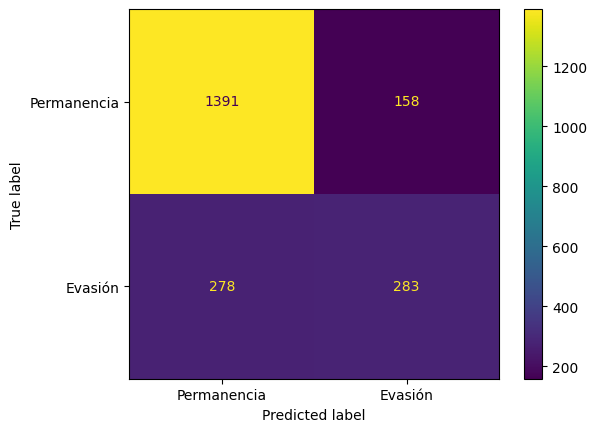

In [51]:
from sklearn.metrics import ConfusionMatrixDisplay

vusualizacion_matriz = ConfusionMatrixDisplay(confusion_matrix=matriz_confusion, display_labels=['Permanencia','Evasión'])
vusualizacion_matriz.plot()

###**Precisión**

In [52]:
from sklearn.metrics import precision_score

precision = precision_score(y_test, y_prevista)

###**Recall(sensibilidad)**

In [53]:
from sklearn.metrics import recall_score

sensibilidad = recall_score(y_test, y_prevista)

In [54]:
#imprime los resultados
from sklearn.metrics import accuracy_score

print(f'La precisión del modelo es: {precision}\nLa sensibilidad del modelo es: {sensibilidad}\nLa exactitud del modelo es: {accuracy_score(y_test, y_prevista)}')

La precisión del modelo es: 0.6417233560090703
La sensibilidad del modelo es: 0.5044563279857398
La exactitud del modelo es: 0.7933649289099526


###**F1-score**

In [55]:
from sklearn.metrics import f1_score

f1 = f1_score(y_test, y_prevista)
f1

0.564870259481038

###**Curva ROC (Receiver Operating Characteristic)**

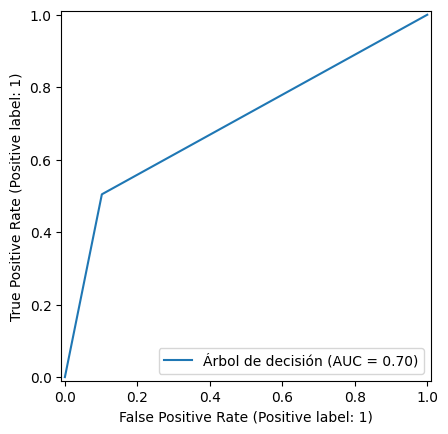

In [56]:
from sklearn.metrics import RocCurveDisplay

RocCurveDisplay.from_predictions(y_test, y_prevista,name='Árbol de decisión');

In [57]:
from sklearn.metrics import roc_auc_score

print(f'El área bajo la curva ROC es: {roc_auc_score(y_test, y_prevista)}')

El área bajo la curva ROC es: 0.7012275184150777


###**Curva de precisión vs. sensibilidad**

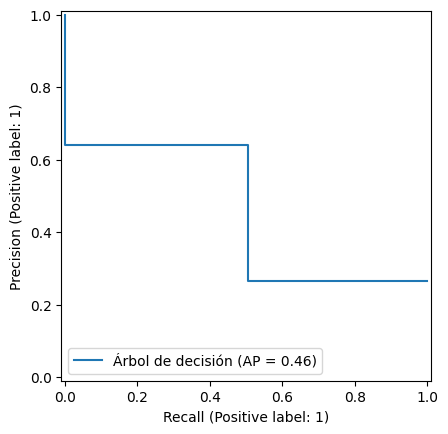

In [58]:
from sklearn.metrics import PrecisionRecallDisplay

PrecisionRecallDisplay.from_predictions(y_test, y_prevista, name='Árbol de decisión');

In [59]:
from sklearn.metrics import average_precision_score

print(f'El score promedio de precisión vs recall es: {average_precision_score(y_test, y_prevista)}')

El score promedio de precisión vs recall es: 0.4554749622573909


###**Informe de métricas**

In [60]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_prevista))

              precision    recall  f1-score   support

           0       0.83      0.90      0.86      1549
           1       0.64      0.50      0.56       561

    accuracy                           0.79      2110
   macro avg       0.74      0.70      0.71      2110
weighted avg       0.78      0.79      0.78      2110



###**Validación cruzada**

In [61]:
from sklearn.model_selection import KFold, cross_validate

In [62]:
modelo_arbol = DecisionTreeClassifier(max_depth=4)
kf = KFold(n_splits=5, shuffle=True, random_state=5)
cv_resultados = cross_validate(modelo_arbol, X, y, cv=kf)
cv_resultados

{'fit_time': array([0.01633596, 0.01322508, 0.01297116, 0.01443148, 0.01316381]),
 'score_time': array([0.00118113, 0.00113797, 0.00111008, 0.00138545, 0.00109577]),
 'test_score': array([0.78251599, 0.78606965, 0.7916074 , 0.79302987, 0.78520626])}

In [63]:
cv_resultados['test_score']

array([0.78251599, 0.78606965, 0.7916074 , 0.79302987, 0.78520626])

In [64]:
promedio = cv_resultados['test_score'].mean()
desvio_std = cv_resultados['test_score'].std()
print(f'El promedio de la exactitud es: {promedio}\nEl desvio estándar es: {desvio_std}')
print(f'El intervalo de confianza es: [{promedio-2*desvio_std}, {min(promedio+2*desvio_std,1)}]')

El promedio de la exactitud es: 0.7876858341901547
El desvio estándar es: 0.0039855992482810765
El intervalo de confianza es: [0.7797146356935926, 0.7956570326867168]


In [65]:
def intervalo_de_confianza(resultados):
    promedio = cv_resultados['test_score'].mean()
    desvio_std = cv_resultados['test_score'].std()
    return f'El intervalo de confianza es: [{promedio-2*desvio_std}, {min(promedio+2*desvio_std,1)}]'

In [66]:
modelo_arbol = DecisionTreeClassifier(max_depth=4)
kf = KFold(n_splits=5, shuffle=True, random_state=5)
cv_resultados = cross_validate(modelo_arbol, X, y, cv=kf, scoring='recall')
cv_resultados

{'fit_time': array([0.01335573, 0.01354766, 0.01476645, 0.01848388, 0.01804018]),
 'score_time': array([0.00402641, 0.00278115, 0.00286961, 0.00443006, 0.00298715]),
 'test_score': array([0.44502618, 0.5025    , 0.36031332, 0.48214286, 0.35869565])}

In [67]:
intervalo_de_confianza(cv_resultados)

'El intervalo de confianza es: [0.3092661588905126, 0.5502050424111411]'

###**Validación estratificada**

####**Verificación de la proporción de Cancelación (Churn)**

In [68]:
#proporción en cantidad
df['Evasión'].value_counts()

Evasión
No    5163
Sí    1869
Name: count, dtype: int64

In [69]:
#proporción en porcentaje
df['Evasión'].value_counts(normalize=True)

Evasión
No    0.734215
Sí    0.265785
Name: proportion, dtype: float64

In [70]:
from sklearn.model_selection import StratifiedKFold

In [71]:
modelo_arbol = DecisionTreeClassifier(max_depth=4)
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=5)
cv_resultados = cross_validate(modelo_arbol, X, y, cv=skf, scoring='recall')

In [72]:
intervalo_de_confianza(cv_resultados)

'El intervalo de confianza es: [0.4247147654082707, 0.5405445140285833]'

##**Balanceo de clases**

##**Oversampling con smote**

In [73]:
#importa el método 'smote'
from imblearn.over_sampling import SMOTE

In [74]:
#instancia el método 'smote'
oversampling = SMOTE()
X_balanceada, y_balanceada = oversampling.fit_resample(X, y)

In [75]:
y_balanceada.value_counts()

AttributeError: 'numpy.ndarray' object has no attribute 'value_counts'

In [76]:
#verifica el tipo de cada variable
print(f'tipo de X : {type(X)}\ntipo de X_balanceada : {type(X_balanceada)}\ntipo de y : {type(y)}\ntipo de y_balanceada : {type(y_balanceada)}')

tipo de X : <class 'numpy.ndarray'>
tipo de X_balanceada : <class 'numpy.ndarray'>
tipo de y : <class 'numpy.ndarray'>
tipo de y_balanceada : <class 'numpy.ndarray'>


In [77]:
#convierte las variables a pd DataFrames
X = pd.DataFrame(X)
X_balanceada = pd.DataFrame(X_balanceada)
y = pd.DataFrame(y)
y_balanceada = pd.DataFrame(y_balanceada)

In [78]:
#verifica el tipo de cada variable
print(f'tipo de X : {type(X)}\ntipo de X_balanceada : {type(X_balanceada)}\ntipo de y : {type(y)}\ntipo de y_balanceada : {type(y_balanceada)}')

tipo de X : <class 'pandas.core.frame.DataFrame'>
tipo de X_balanceada : <class 'pandas.core.frame.DataFrame'>
tipo de y : <class 'pandas.core.frame.DataFrame'>
tipo de y_balanceada : <class 'pandas.core.frame.DataFrame'>


In [79]:
#verifica la proporción de y_balanceada en cantidad
y_balanceada.value_counts()

0
0    5163
1    5163
Name: count, dtype: int64

In [80]:
#verifica la proporción de y_balanceada en porcentaje
y_balanceada.value_counts(normalize=True)

0
0    0.5
1    0.5
Name: proportion, dtype: float64

In [81]:
modelo_arbol = DecisionTreeClassifier(max_depth=4)
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=5)
cv_resultados = cross_validate(modelo_arbol, X_balanceada, y_balanceada, cv=skf, scoring='recall')

In [82]:
intervalo_de_confianza(cv_resultados)

'El intervalo de confianza es: [0.8021438121536572, 0.9313249737262593]'

##**Oversampling con Pipeline**

In [83]:
from imblearn.pipeline import Pipeline as imbpipeline

In [84]:
modelo_arbol = DecisionTreeClassifier(max_depth=4)
pipeline = imbpipeline([('oversample', SMOTE()), ('arbol', modelo_arbol)])

In [85]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=5)
cv_resultados = cross_validate(pipeline, X, y, cv=skf, scoring='recall')

In [86]:
intervalo_de_confianza(cv_resultados)

'El intervalo de confianza es: [0.6886726529977465, 0.8244268007735256]'

##**Undersampling con NearMiss**

In [87]:
from imblearn.under_sampling import NearMiss

In [88]:
modelo_arbol = DecisionTreeClassifier(max_depth=4)
pipeline = imbpipeline([('undersample', NearMiss(version=3)), ('arbol', modelo_arbol)])
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=5)
cv_resultados = cross_validate(pipeline, X, y, cv=skf, scoring='recall')

In [89]:
intervalo_de_confianza(cv_resultados)

'El intervalo de confianza es: [0.4126778964144921, 0.9785738419118404]'

##**Probando el modelo**

In [90]:
undersample = NearMiss(version=3)
X_balanceada, y_balanceada = undersample.fit_resample(X, y)

              precision    recall  f1-score   support

           0       0.89      0.76      0.82      1549
           1       0.53      0.75      0.62       561

    accuracy                           0.76      2110
   macro avg       0.71      0.75      0.72      2110
weighted avg       0.80      0.76      0.77      2110



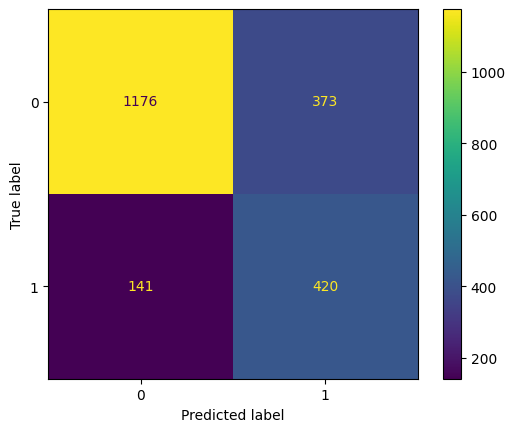

In [91]:
modelo_arbol = DecisionTreeClassifier(max_depth=4)
modelo_arbol.fit(X_balanceada, y_balanceada)
y_prevista = modelo_arbol.predict(X_test)

print(classification_report(y_test, y_prevista))
ConfusionMatrixDisplay.from_predictions(y_test, y_prevista);

##**Interpretación y conclusiones**

- El modelo logra predecir con una gran sensibilidad los clientes en permanencia con un recall del 75% y disminuye considerablemente la cantidad de falsos positivos